In [1]:
#Ejercicio 4
#Entrena un modelo en Keras que tenga al menos tres capas convolucionales, use
#regularización y early stopping para resolver el problema de clasificación con los datos
#Fashion MNIST que están en Keras. Comprueba que el proceso de entrenamiento ha
#convergido mostrando las curvas de entrenamiento. 

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam

In [5]:
#Importo los datos y separo el modelo
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
#Creo una etiquetya para cada producto, solo lo uso para plotear los productos
productos = ['camisetas', 'Pantalones', 'Abrigos', 'Vestidos', 'Chaquetas',
               'Chanclas', 'Camisas', 'Zapatillas', 'Bolsos', 'Botas altas']

In [7]:
train_images.shape

(60000, 28, 28)

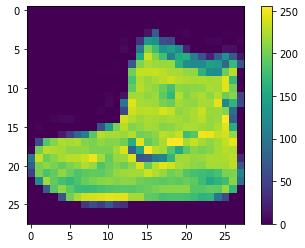

In [8]:
#Inspecciono la primera imagen para saber el numero de pixeles que tiene
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Normalizo las imagenes de los sets de entrenameinto y validacion
train_images = train_images / 255

test_images = test_images / 255

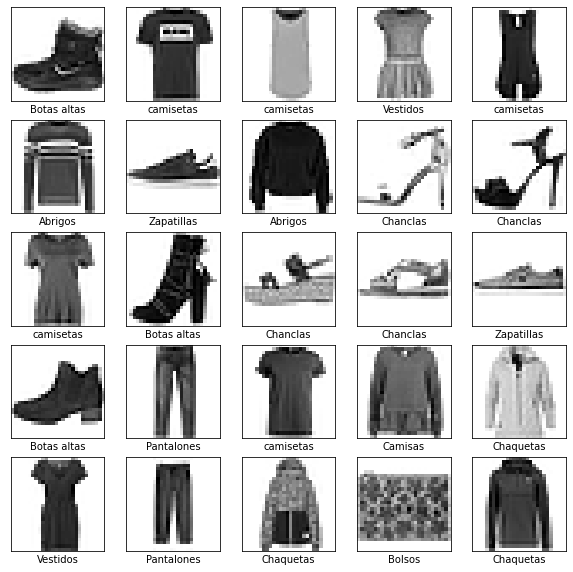

In [10]:
#Compruebo como son las imagenes de los datos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(productos[train_labels[i]])
plt.show()

In [11]:
#hago un reshape para qpasarle las dimensiones correctas al modelo que si no se jode
train_images = train_images.reshape(60000, 28, 28, 1)#se pone el 1 porque son fotos sin color

test_images = test_images.reshape(10000, 28,28, 1)

In [12]:
#Hago un One Hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
#Creo el modelo
input_shape = train_images.shape[1:]

modelo_4 = Sequential()

modelo_4.add(Conv2D(32, kernel_size=(4,6), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Flatten())
modelo_4.add(Dense(10, activation='softmax'))

In [14]:
#Compilo el modelo
modelo_4.compile(Adam(learning_rate=(0.0001)),
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

In [15]:
#Pongo el early stopping. Lo capo si el error de validacion no baja
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20) 
historia = modelo_4.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=64, epochs=20, callbacks=early_stop)

Epoch 1/20
938/938 [==============================] - 142s 151ms/step - loss: 1.1373 - acc: 0.7463 - val_loss: 0.8184 - val_acc: 0.8137
Epoch 2/20
938/938 [==============================] - 140s 149ms/step - loss: 0.7284 - acc: 0.8256 - val_loss: 0.6633 - val_acc: 0.8302
Epoch 3/20
938/938 [==============================] - 141s 151ms/step - loss: 0.6113 - acc: 0.8393 - val_loss: 0.5847 - val_acc: 0.8374
Epoch 4/20
938/938 [==============================] - 139s 149ms/step - loss: 0.5487 - acc: 0.8461 - val_loss: 0.5461 - val_acc: 0.8390
Epoch 5/20
938/938 [==============================] - 124s 133ms/step - loss: 0.5100 - acc: 0.8517 - val_loss: 0.5051 - val_acc: 0.8513
Epoch 6/20
938/938 [==============================] - 126s 134ms/step - loss: 0.4833 - acc: 0.8553 - val_loss: 0.4822 - val_acc: 0.8565
Epoch 7/20
938/938 [==============================] - 131s 139ms/step - loss: 0.4636 - acc: 0.8594 - val_loss: 0.4698 - val_acc: 0.8560
Epoch 8/20
938/938 [============================

In [16]:
modelo_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        800       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [17]:
score_4 = modelo_4.evaluate(test_images,test_labels)
score_4

313/313 [==============================] - 5s 14ms/step - loss: 0.4108 - acc: 0.8726


[0.41078662872314453, 0.8726000189781189]

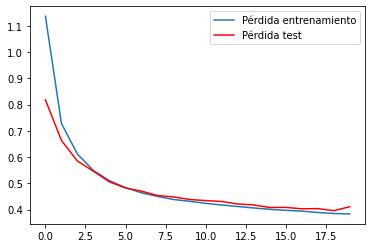

In [18]:
%matplotlib inline
plt.figure
plt.plot(historia.history['loss'], label='Pérdida entrenamiento')
plt.plot(historia.history['val_loss'], 'r', label='Pérdida test')
plt.legend()

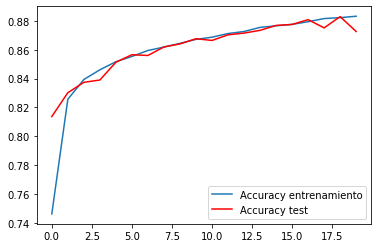

In [19]:
%matplotlib inline
plt.figure
plt.plot(historia.history['acc'], label='Accuracy entrenamiento')
plt.plot(historia.history['val_acc'], 'r', label='Accuracy test')
plt.legend()